In [1]:
import illustris_python.groupcat as gc
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
import h5py
import study_pairs_abacus as spa
%matplotlib inline
plt.style.use('astroandes.mplstyle')

In [2]:
spa.all_data()

Finished reading ../data/pairs_box_00.hdf5
processing box  0
Finished reading ../data/pairs_box_01.hdf5
processing box  1
Finished reading ../data/pairs_box_02.hdf5
processing box  2
Finished reading ../data/pairs_box_03.hdf5
processing box  3
Finished reading ../data/pairs_box_04.hdf5
processing box  4
Finished reading ../data/pairs_box_05.hdf5
processing box  5
Finished reading ../data/pairs_box_06.hdf5
processing box  6
Finished reading ../data/pairs_box_07.hdf5
processing box  7
Finished reading ../data/pairs_box_08.hdf5
processing box  8
Finished reading ../data/pairs_box_09.hdf5
processing box  9
Finished reading ../data/pairs_box_10.hdf5
processing box  10
Finished reading ../data/pairs_box_11.hdf5
processing box  11
Finished reading ../data/pairs_box_12.hdf5
processing box  12
Finished reading ../data/pairs_box_13.hdf5
processing box  13
Finished reading ../data/pairs_box_14.hdf5
processing box  14
Finished reading ../data/pairs_box_15.hdf5
processing box  15
Finished reading .

In [37]:
BoxID = 6
data = spa.load_box(BoxID=BoxID)
vlim = {'mean':627, 'sigma':22}

Finished reading ../data/pairs_box_06.hdf5


In [38]:
data.keys()

dict_keys(['vel_A_mag', 'vel_B_mag', 'pos_AB', 'vel_AB', 'vel_AB_rad', 'vel_AB_tan', 'vmax_A', 'vmax_B', 'mu', 'vel_G_mag', 'vmax_G'])

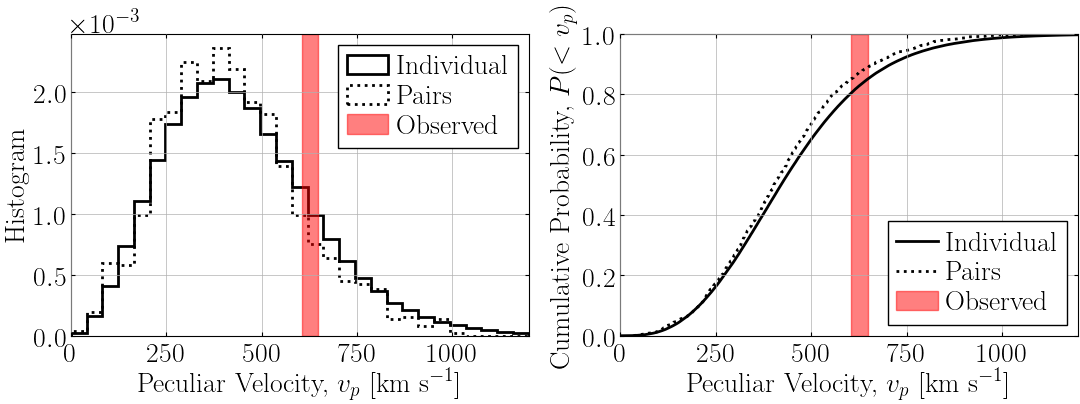

In [39]:
ii = (data['vmax_A']<240) & (data['vmax_B']<240)
ii &= (data['vel_AB_rad']<0) 
ii &= (np.abs(data['vel_AB_rad'])>data['vel_AB_tan'])
ll = (data['vmax_G']<240)
plt.figure(figsize=(13,4))

ax = plt.subplot(1,2,1)
ax.ticklabel_format(style='sci', scilimits=(0,5))

plt.hist(data['vel_G_mag'][ll], 
         bins=np.linspace(0,1200,30), 
         density=True, histtype='step', color='black', label='Individual',
         linestyle='-', linewidth=2)
plt.hist(data['vel_B_mag'][ii], 
         bins=np.linspace(0,1200,30),
         density=True, histtype='step', color='black', label='Pairs',
         linestyle=':', linewidth=2)
plt.axvspan(vlim['mean']-vlim['sigma'], vlim['mean']+vlim['sigma'], 
            alpha=0.5, color='red', label='Observed')
plt.legend()
plt.xlim([0,1200])
plt.grid(linewidth=0.5)

plt.xlabel("Peculiar Velocity, $v_p$ [km s$^{-1}$]")
plt.ylabel("Histogram")

plt.subplot(1,2,2)

plt.axvspan(vlim['mean']-vlim['sigma'], vlim['mean']+vlim['sigma'], 
            alpha=0.5, color='red', label='Observed')
plt.plot(np.sort(data['vel_G_mag'][ll]), 
         np.linspace(0,1,np.count_nonzero(ll)), 
         linestyle='-', color='black', label='Individual')
plt.plot(np.sort(data['vel_B_mag'][ii]), 
         np.linspace(0,1,np.count_nonzero(ii)), 
         linestyle=':', color='black', label='Pairs')

plt.legend()
plt.xlim([0,1200])
plt.ylim([0,1])
plt.grid(linewidth=0.5)
plt.xlabel('Peculiar Velocity, $v_p$ [km s$^{-1}$]')
plt.ylabel("Cumulative Probability, $P(<v_p)$")

plt.savefig("../paper/cumulative_probability_{:02d}.pdf".format(BoxID),  bbox_inches="tight")

In [43]:
filename = '../data/pairs_box_{:02d}.hdf5'.format(6)
data = {}
f = h5py.File(filename, 'r')
for k in f.keys():
    data[k] = f[k][...]
f.close()
print("Finished reading {}".format(filename))

Finished reading ../data/pairs_box_06.hdf5


In [44]:
data['vel_B_mag'] = np.sqrt(np.sum(data['vel_B']**2, axis=1))
data['vel_A_mag'] = np.sqrt(np.sum(data['vel_A']**2, axis=1))

data['vel_AB'] = np.sqrt(np.sum( (data['vel_B'] - data['vel_A'])**2, axis=1)) # comoving
data['pos_AB'] = np.sqrt(np.sum( (data['pos_B'] - data['pos_A'])**2, axis=1))

data['mu'] = np.abs(np.sum((data['pos_B']-data['pos_A'])*(data['vel_B']), axis=1)/(data['vel_B_mag']*data['pos_AB']))


data['vel_AB_rad'] = np.sum((data['pos_B'] - data['pos_A'])*(data['vel_B'] - data['vel_A']), axis=1)/data['pos_AB'] #comoving
data['vel_AB_tan'] = np.sqrt((data['vel_AB']**2 - data['vel_AB_rad']**2))# comoving

ii = (data['vmax_A']<240) & (data['vmax_B']<240)
ii &= (data['vel_AB_rad']<0) 
ii &= (np.abs(data['vel_AB_rad'])>data['vel_AB_tan'])
jj = data['vel_B_mag']>627


0.51120055
0.5706612


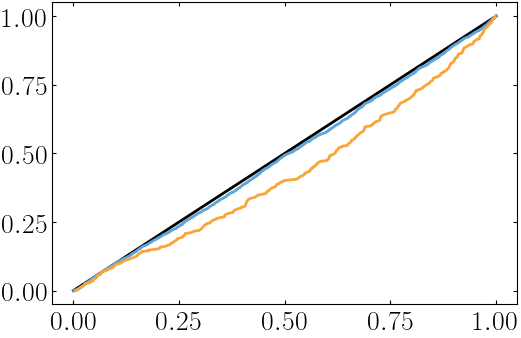

In [45]:
x = np.linspace(0,1,len(data['mu'][ii&jj]))
plt.plot(x, x, color='black')
plt.plot(np.sort(data['mu'][ii]),np.linspace(0,1,len(data['mu'][ii])))
plt.plot(np.sort(data['mu'][ii&jj]),np.linspace(0,1,len(data['mu'][ii&jj])))

print(np.mean(data['mu'][ii]))
print(np.mean(data['mu'][ii&jj]))

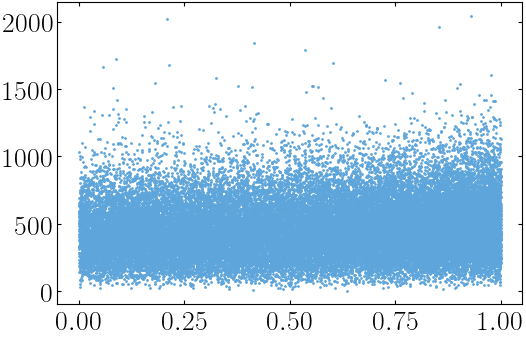

In [10]:
plt.scatter(data['mu'], data['vel_B_mag'], s=1.0)